In [1]:
#allows plots in notebook
%matplotlib inline
#sets notebook figures to high quality svg
%config InlineBackend.figure_format = 'svg'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Lets the notebook transition to R  easily!
#%load_ext rpy2.ipython

#importing ODElib for this demo
import os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))
import ODElib
from ODElib.Statistics.distributions import Positive_Normal

#profiler for code
#%load_ext snakeviz

#too many warning crash the notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
#sys.path.append("/home/spiridon/Research/growth_curves/src")
#from ModelFrameworks import SnI

In [3]:
# the models

# zero infected classes
def zero_i(y,t,ps):
    mu,phi,beta=ps[0],ps[1],ps[2]
    S,V = y[0],y[1]
    dSdt = mu*S - phi*S*V
    dVdt = beta*phi*S*V - phi*S*V
    return [dSdt,dVdt]

# one infected classes
def one_i(y,t,ps):
    mu,phi,beta,lam=ps[0],ps[1],ps[2],ps[3]
    S,I1,V = y[0],y[1],y[2]
    dSdt = mu*S - phi*S*V
    dI1dt = phi*S*V - lam*I1
    dVdt = beta*lam*I1 - phi*S*V
    return np.array([dSdt,dI1dt,dVdt])

# two infected classes
def two_i(y,t,ps):
    mu,phi,beta,lam,tau1=ps[0],ps[1],ps[2],ps[3],ps[4]
    S,I1,I2,V = y[0],y[1],y[2],y[3]
    dSdt = mu*S - phi*S*V
    dI1dt = phi*S*V - I1/tau1
    dI2dt = I1/tau1 - lam*I2
    dVdt = beta*lam*I2 - phi*S*V
    return np.array([dSdt,dI1dt,dI2dt,dVdt])

# three infected classes
def three_i(y,t,ps):
    mu,phi,beta,tau1,tau2,lam=ps[0],ps[1],ps[2],ps[3],ps[4],ps[5]
    S,I1,I2,I3,V = y[0],y[1],y[2],y[3],y[4]
    dSdt = mu*S - phi*S*V
    dI1dt = phi*S*V - I1/tau1
    dI2dt = I1/tau1 - I2/tau2
    dI3dt = I2/tau2 - lam*I3
    dVdt = beta*lam*I3 - phi*S*V
    return np.array([dSdt,dI1dt,dI2dt,dI3dt,dVdt])

# four infected classes
def four_i(y,t,ps):
    mu,phi,beta,lam,tau1,tau2,tau3=ps[0],ps[1],ps[2],ps[3],ps[4],ps[5],ps[6]
    S,I1,I2,I3,I4,V = y[0],y[1],y[2],y[3],y[4],y[5]
    dSdt = mu*S - phi*S*V
    dI1dt = phi*S*V - I1/tau1
    dI2dt = I1/tau1 - I2/tau2
    dI3dt = I2/tau2 - I3/tau3
    dI4dt = I3/tau3 - lam*I4
    dVdt = beta*lam*I4 - phi*S*V
    return np.array([dSdt,dI1dt,dI2dt,dI3dt,dI4dt,dVdt])

# five infected classes
def five_i(y,t,ps):
    mu,phi,beta,lam,tau1,tau2,tau3,tau4=ps[0],ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7]
    S,I1,I2,I3,I4,I5,V = y[0],y[1],y[2],y[3],y[4],y[5],y[6]
    dSdt = mu*S - phi*S*V
    dI1dt = phi*S*V - I1/tau1
    dI2dt = I1/tau1 - I2/tau2
    dI3dt = I2/tau2 - I3/tau3
    dI4dt = I3/tau3 - I4/tau4
    dI5dt = I4/tau4 - lam*I5
    dVdt = beta*lam*I5 - phi*S*V
    return np.array([dSdt,dI1dt,dI2dt,dI3dt,dI4dt,dI5dt,dVdt])

In [4]:
df = pd.read_csv("testdat.csv")
df=df.replace({'virus':'V','host':'S'})
df=df.rename({'uncertainty':'sigma'},axis=1)
df
#check log transformed default in previous code!!!!!!!!!!!

,organism,time,abundance,sigma
0,V,0.0,10981000,656690.00
1,V,0.2,12959000,2987300.00
2,V,0.3,13273000,3480600.00
3,V,0.5,17914000,3981250.00
4,V,0.7,15899000,4815700.00
5,V,0.9,13881000,3985500.00
6,V,0.9,15545000,3491900.00
7,V,1.0,14527000,5474350.00
8,V,1.2,12516000,6314200.00
9,V,1.3,32464000,22926000.00


In [5]:
#For demonstration puposes, lets start off with zero infected classes

zeroI=ODElib.ModelFramework(ODE=zero_i,
                          parameter_names=['mu','phi','beta'],
                          state_names = ['S','V'],
                          dataframe=df,
                          mu = 1e-6,
                          phi = 1e-8,
                          beta = 40,
                          t_steps=288
                         )
zeroI

Current Model = __main__.zero_i
Parameters:
	mu = 1e-06
	phi = 1e-08
	beta = 40
Initial States:
	S = 5236899.999999998
	V = 10980999.999999985

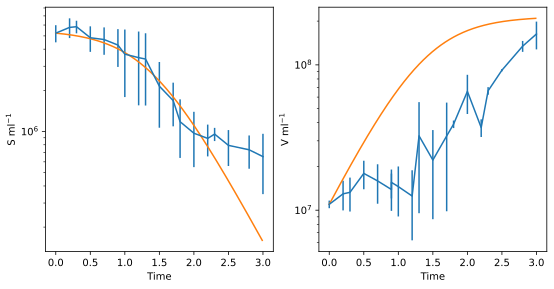

In [6]:
f,ax=zeroI.plot()

Starting 32 processes with 8 cores	[DONE]
Setting parameters to median of posterior

Fitting Report
parameter: mu
	median = 2.587e-07, Standard deviation = 7.427e-07
parameter: phi
	median = 1.377e-08, Standard deviation = 4.908e-10
parameter: beta
	median = 1.915e+01, Standard deviation = 4.180e-01

Median parameter fit stats:
	Chi = 2.159e+02
	Adjusted R-squared = 5.861e-01
	AIC = 4.377e+02


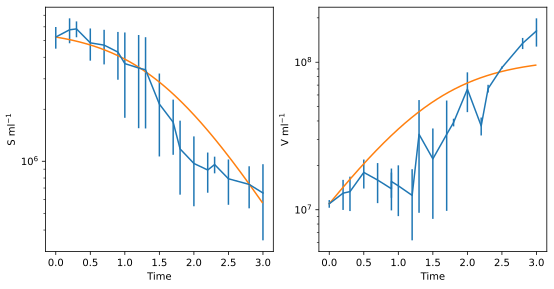

In [7]:
#reduced the number of chains or iterations_per_chain to decrease runtime
posteriors = zeroI.MCMC(chain_inits = 32,
                        iterations_per_chain=10000,
                        cpu_cores=8
                        )
f,ax=zeroI.plot()

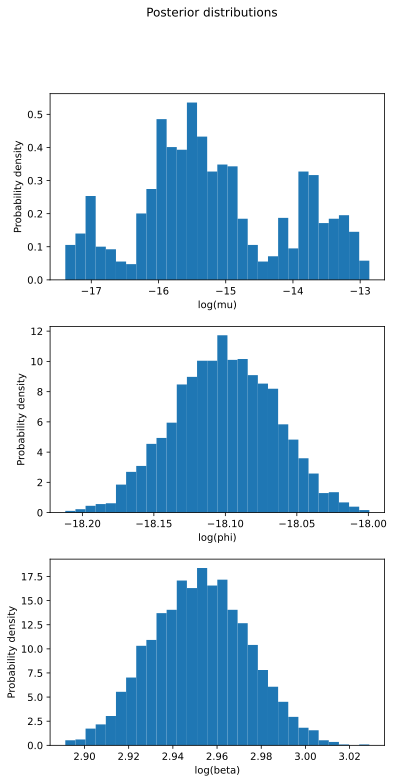

In [8]:
pnames = zeroI.get_pnames()
dim = len(pnames)
f,ax = plt.subplots(dim,figsize=[dim*2,dim*4])
ax = ax.flatten()
for (a,p,i) in zip(ax,pnames,range(len(pnames))):
    a.hist(np.log(posteriors[p]),30,density=True)
    a.set_xlabel('log('+p+')')
    a.set_ylabel('Probability density')
f.suptitle('Posterior distributions')
f.subplots_adjust(hspace=0.25,wspace=0.25)  